# Download Dataset

In [ ]:
# menyambungkan GDrive
from google.colab import drive
drive.mount('/content/gdrive')

# mengonfigurasikan posisi file kaggle.json
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# mengubah lokasi saat ini ke lokasi konfigurasi
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
# download dataset pada kaggle
!kaggle datasets download -d arashnic/book-recommendation-dataset

# mengekstrak file zip dan menghapus file zip tersebut
!unzip \*.zip  && rm *.zip

 84% 20.0M/23.8M [00:00<00:00, 12.6MB/s]
100% 23.8M/23.8M [00:00<00:00, 25.8MB/s]
Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


# Data Understanding & Preparation
Dataset yang digunakan dapat di-download melalui [Kaggle](https://www.kaggle.com/arashnic/book-recommendation-dataset).

In [ ]:
# import library yang umum digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Book
File ini berisikan 8 kolom yang memiliki 271.379  sampel data. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:
- `ISBN`, merupakan kode pengidentifikasian suatu buku.
- `Book-Title`, merupakan judul dari buku terkait.
- `Book-Author`, merupakan penulis dari buku terkait.
- `Year-Of-Publication`, merupakan tahun keluaran dari buku terkait.
- `Publisher`, merupakan pencetak dari buku terkait.
- `Image-URL-S`, merupakan link URL dari buku terkait berukuran kecil (small).
- `Image-URL-M`, merupakan link URL dari buku terkait berukuran kecil (medium).
- `Image-URL-L`, merupakan link URL dari buku terkait berukuran kecil (large).

In [ ]:
# load data buku
df_book = pd.read_csv('Books.csv')

# lihat datanya
df_book.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# melihat informasi dataset
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


>**Pembahasan:** <br>
Pada output di atas dapat diketahui bahwa terdapat nilai yang kosong pada beberapa kolom. Sebenarnya data URL gambarnya tidak diperlukan dan tidak ada kepentingannya sama sekali sehingga dapat dihapus.

In [ ]:
# hapus kolom gambar
df_book.drop(columns=["Image-URL-S","Image-URL-M","Image-URL-L"], inplace=True)

# lihat datanya
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
# mengecek nilai yang kosong
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

>**Pembahasan:** <br>
Terdapat 2 kolom yang memiliki nilai yang kosong yaitu `Book-Author` dan `Publisher`. Namun difokuskan untuk menangani kolom `Book-Author` saja karena pada output rekomendasi diharapkan untuk menampilkan judul dan penulis bukunya.

In [ ]:
# cek data mana yang kosong
df_book[df_book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


>**Pembahasan:** <br>
Data penulis yang hilang terdapat pada judul buku `The Credit Suisse Guide to Managing Your Personal Wealth`. Setelah dilakukan pengecekan manual ternyata penulis bukunya ialah `Larissa Anne Downes` sehingga datanya dapat diperbaiki terlebih dahulu sebelum digunakan lebih lanjut.

In [ ]:
df_book['Book-Author'][187689] = 'Larissa Anne Downes'

In [ ]:
# cek ulang apakah sudah terisi
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
dtype: int64

## Rating
File ini berisikan 3 kolom yang memiliki 1.149.780  sampel data. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:
- `User-ID`, merupakan id pembaca.
- `ISBN`, merupakan kode pengidentifikasian suatu buku.
- `Book-Rating`, merupakan rating dari buku yang dinilai oleh pembaca.

In [ ]:
# load data rating
df_rating = pd.read_csv('Ratings.csv')

# lihat datanya
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# melihat informasi dataset
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


>**Pembahasan:** <br>
Tidak terdapat kesalahan apapun pada informasi output di atas sehingga tidak perlu dilakukan perubahan apapun.

In [ ]:
# lihat data yang kosong
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# lihat distribusi nilai rating
df_rating['Book-Rating'].value_counts().sort_values()

1       1770
2       2759
3       5996
4       8904
6      36924
5      50974
9      67541
7      76457
10     78610
8     103736
0     716109
Name: Book-Rating, dtype: int64

>**Pembahasan:** <br>
Pada output terdapat sesuatu yang sedikit membingungkan yaitu terdapat nilai `0` pada nilai rating. Dapat terpikirkan asumsi bahwa pengguna memiliki buku tetapi belum selesai membacanya atau sudah selesai membaca tapi belum memberikan rating. Karena disini akan dibuat sistem rekomendasi menggunakan data rating yang tentunya memiliki kemiripan terhadap buku yang telah dibaca. Tentunya akan berfokus pada data dengan rating yang jelas. Sehingga, nilai dengan rating `0` akan di-abaikan.

In [ ]:
# cek ukuran data
len(df_rating)

1149780

In [ ]:
# mengabaikan data dengan rating 0
df_rating = df_rating[df_rating['Book-Rating'] != 0]

In [ ]:
# cek ukuran data kembali
len(df_rating)

433671

In [ ]:
# ubah id user menjadi list tanpa nilai yang sama
user_ids = df_rating['User-ID'].unique().tolist()
# print('list userID: ', user_ids)
 
# encoding id user
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
# print('encoded userID : ', user_to_user_encoded)
 
# proses encoding angka ke ke id user
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
# print('encoded angka ke userID: ', user_encoded_to_user)

In [ ]:
# ubah isbn menjadi list tanpa nilai yang sama
book_ids = df_rating['ISBN'].unique().tolist()
# print('list bookID: ', book_ids)
 
# proses encoding isbn
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
# print('encoded bookID : ', book_to_book_encoded)
 
# proses encoding angka ke isbn
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
# print('encoded angka ke bookID: ', book_encoded_to_book)

In [ ]:
# ambil dataframe sebelumnya
df = df_rating

# mapping user id ke dataframe
df['user'] = df_rating['User-ID'].map(user_to_user_encoded)
 
# mapping isbn ke dataframe
df['book'] = df_rating['ISBN'].map(book_to_book_encoded)

In [ ]:
# ambil jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# ambil jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)
 
# ubah tipe data rating menjadi float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# ambil nilai rating terkecil
min_rating = min(df['Book-Rating'])
 
# ambil nilai rating tertinggi
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

77805
185973
Number of User: 77805, Number of Book: 185973, Min Rating: 1.0, Max Rating: 10.0


In [ ]:
# acak datasetnya
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,8.0,9713,1013
211411,49144,8422641127,5.0,14390,54663
647520,156424,3442453844,7.0,44370,127953
30124,7125,0060586125,8.0,2587,10359
1052982,251606,0316789844,8.0,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7.0,45235,70428
958724,231613,0747542333,5.0,65186,33018
335707,79923,0440206154,8.0,22993,6822
373697,89610,8880891960,5.0,25753,84887


In [ ]:
# pilih data fitur/independen
x = df[['user', 'book']].values
 
# pilih rating sebagai label/output/dependen
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# bagi menjadi 80% data latih dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


# Modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
  # menggunakan teknik embedding untuk menghitung kecocokan data user dan buku
  # insialisasi constructor
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 30,
    steps_per_epoch = 300,
    # validation_steps = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/30
300/300 [==============================] - 170s 558ms/step - loss: 0.6920 - root_mean_squared_error: 0.3114 - val_loss: 0.6905 - val_root_mean_squared_error: 0.3083
Epoch 2/30
300/300 [==============================] - 183s 611ms/step - loss: 0.6890 - root_mean_squared_error: 0.3079 - val_loss: 0.6872 - val_root_mean_squared_error: 0.3056
Epoch 3/30
300/300 [==============================] - 173s 579ms/step - loss: 0.6854 - root_mean_squared_error: 0.3047 - val_loss: 0.6840 - val_root_mean_squared_error: 0.3029
Epoch 4/30
300/300 [==============================] - 167s 557ms/step - loss: 0.6823 - root_mean_squared_error: 0.3021 - val_loss: 0.6809 - val_root_mean_squared_error: 0.3002
Epoch 5/30
300/300 [==============================] - 165s 551ms/step - loss: 0.6795 - root_mean_squared_error: 0.2957 - val_loss: 0.6779 - val_root_mean_squared_error: 0.2977
Epoch 6/30
300/300 [==============================] - 166s 553ms/step - loss: 0.6764 - root_mean_squared_error: 0.2982 -

# Evaluation

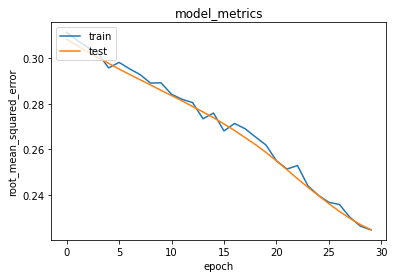

In [ ]:
# lihat visualisasi metrik model
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

>**Pembahasan:** <br>
Nilai error pada data latih dan validasi model memiliki nilai yang relatif sama. Bahkan pada iterasi terakhir memiliki nilai error yang persis sama yaitu `0.2246`. Nilai tersebut cukup baik untuk pemodelan sistem rekomendasi.

In [ ]:
# menghubungkan data rating dengan buku dengan kolom ISBN
df_mix = pd.merge(df_rating, df_book, on='ISBN')

# hapus data ISBN yang kembar sehingga hanya memiliki nilai yang unik saja
df_mix.drop_duplicates('ISBN', inplace=True)

In [ ]:
# ambil data kolom ISBN menjadi dalam bentuk list
book_id = df_mix['ISBN'].tolist()
 
# ambil data kolom title menjadi dalam bentuk list
book_title = df_mix['Book-Title'].tolist()
 
# ambil data kolom author menjadi dalam bentuk list
book_author = df_mix['Book-Author'].tolist()

# cek ukuran datanya
print(len(book_id))
print(len(book_title))
print(len(book_author))

149836
149836
149836


In [ ]:
# buat dataframe khusus dengan list sebelumnya
book_df = pd.DataFrame({
    'ISBN': book_id,
    'title': book_title,
    'author': book_author
})

book_df.head()

,ISBN,title,author
0,0155061224,Rites of Passage,Judith Rae
1,052165615X,Help!: Level 1,Philip Prowse
2,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
3,038550120X,A Painted House,JOHN GRISHAM
4,0060517794,Little Altars Everywhere,Rebecca Wells


In [ ]:
# ambil sampel salah satu user
user_id = df_rating['User-ID'].sample(1).iloc[0]

# data buku yang dibaca user
book_read_by_user = df_rating[df_rating['User-ID'] == user_id]
 
# filter data yang belum pernah dibaca user
book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user['ISBN'].values)]['ISBN'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [ ]:
# prediksi kecocokan terhadap buku yang telah dibaca
ratings = model.predict(user_book_array).flatten()

# 10 hasi prediksi terbaik
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]

In [ ]:
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(f'{row.title} : {row.author}')

Showing recommendations for users: 239423
Book with high ratings from user
--------------------------------
Harry Potter and the Sorcerer's Stone (Book 1) : J. K. Rowling
Pope Joan (Ballantine Reader's Circle) : Donna Woolfolk Cross
Emily of New Moon : L.M. MONTGOMERY
Poodles: A Book of Postcards : Andrews McMeel Publishing
The Onion Girl (Newford) : Charles de Lint
Prophecy: Child of Earth : Elizabeth Haydon
Vincalis the Agitator : Holly Lisle
The Gates of Sleep : Mercedes Lackey
Thendara House : Marion Zimm Bradley
Emily's Quest : L. M. Montgomery


In [ ]:
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(f'{row.title} : {row.author}')

--------------------------------
Top 10 book recommendation
--------------------------------
The Da Vinci Code : Dan Brown
To Kill a Mockingbird : Harper Lee
Girl with a Pearl Earring : Tracy Chevalier
The Red Tent (Bestselling Backlist) : Anita Diamant
The Lovely Bones: A Novel : Alice Sebold
The Secret Life of Bees : Sue Monk Kidd
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
The Joy Luck Club : Amy Tan
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
Harry Potter and the Chamber of Secrets (Book 2) : J. K. Rowling


>**Pembahasan:** <br>
Dari output hasil rekomendasi terhadap pengguna di atas, dapat terlihat kesesuaian dari rekomendasi yang diberikan, sebab terlihat pengguna pernah membaca buku Harry Potter kemudian sistem merekomendasikan untuk membaca buku Harry Potter lainnya.